<a href="https://colab.research.google.com/github/Dkepffl/2022-2-ESAA/blob/main/Assignment/Assignment220918_trianing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER 4 모델 훈련**
___
- 적절한 모델과 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼 파라미터를 찾기 위해, 모델의 작동 원리에 대해 이해해보자.
- 이 장에서는 가장 간단한 모델 중 하나인 선형 회귀부터 시작한다. 이 모델을 훈련시키는 두 가지 방법을 알아보자.
  + 직접 계산할 수 있는 공식을 사용하여, 훈련 세트에 가장 잘 맞는 모델 파라미터를 **해석적으로** 구한다.
  + 경사하강법이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화한다. 결국에는 앞의 방법과 동일한 파라미터로 수렴한다.
- 그 다음에는 비선형 데이터셋에 훈련시킬 수 있는 다항 회귀를 살펴볼 예정이다. 이 모델은 선형 회귀보다 파라미터가 많아, 훈련 데이터에 과적합되기 더 쉽다. 따라서 학습 곡선(Learning Curve)을 사용해 모델이 과대적합되는지 감지하는 방법도 살펴보자.
- 그리고 훈련 세트의 과적합을 감소시킬 수 있는 규제 기법을 몇 가지 알아볼 예정이다.
- 마지막으로 분류 작업에 널리 사용되는 모델인 로지스틱 회귀와 소프트맥스 회귀를 살펴 볼 예정이다.

In [2]:
# import package
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import os

## **4.1 선형 회귀**
____
- 다음은 1장에서 본 삶의 만족도에 대한 간단한 선형 회귀 모델이다.
$$ 삶의 만족도 = \theta_0 + \theta_1 \times 1인당 GDP$$
- 이 모델은 피처가 1인당 GDP인 선형 함수로, $\theta_0$과 $\theta_1$이 모델 파라미터이다.
- 일반적인 선형 모델은 아래 수식처럼 예측한다.
$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... +\theta_n x_n$$
  + $\hat{y}$ : 예측값
  + $n$ : 피처 개수
  + $x_i$ : i번째 피처값
  + $\theta_j$ : j번째 모델 파라미터(편향과 가중치)
- 이 수식은 벡터를 활용하면 더 간단하게 아래와 같이 쓸 수 있다.
$$ \hat{y} = h_{\theta}(x) = \theta \cdot X$$
  + $\theta$ : 편향과 피처의 가중치로 이루어진 모델 파라미터 벡터
  + $X$ : $x_0$부터 $x_m$까지 있는 피처 벡터. $x_0$는 항상 1이다.
  + $\theta \cdot X$ : 벡터 $\theta$와 $X$의 내적으로 $\theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... +\theta_n x_n$와 같다.
  + $h_{\theta}(x)$ : 모델 파라미터 $\theta$를 이용한 가설(hypothesis) 함수이다.
- 이제 모델을 훈련시켜보자. 모델을 훈련시킨다는 것은 **모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것**이다.
- 이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 한다. 회귀에 가장 널리 사용되는 성능 측정 지표는 RMSE이다. 다만 MSE를 최소화하는 것이 같은 결과를 내면서 더 간단하기 때문에, MSE를 사용할 예정이다. 
- 훈련 세트 **X**에 대한 선형 회귀 가설 $h_{\theta}$의 MSE는 아래처럼 계산한다. 간단하게 표시하기 위해 $MSE(X, h_{\theta} )$ 대신 $MSE(\theta)$로 쓰자.
$$MSE(X, h_{\theta} )= \frac{1}{m}\sum^m_{i=1} (\theta^T x^{(i)} -y^{(i)} )^2$$


#### | **4.1.1 정규방정식**
- 비용 함수 MSE를 최소화하는 $\theta$ 값을 찾기 위한 해석적인 방법(=바로 결과를 얻을 수 있는 수학 공식)이 있다. 이를 **정규방정식(normal equation)**이라고 한다.
$$ \hat{\theta} = (X^T X)^{-1}X^Ty$$
  + $\hat{\theta}$ : 비용 함수를 최소화하는 $\theta$ 값
  + $y$는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타겟 벡터
- 이 공식을 테스트하기 위해 선형처럼 보이는 데이터를 생성해보자.

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

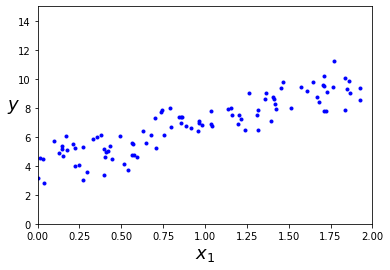

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

plt.show()

- 이제 정규방정식을 사용해 $\hat{\theta}$을 계산해보자. 넘파이의 선형대수 모듈에 있는 `inv()` 함수를 이용해 역행렬을 계산하고, `dot()` 메서드를 사용해 행렬 곱셈을 한다.

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

- 이 데이터를 생성하기 위해 사용한 함수는 $y = y + 3x_1 + 가우시안잡음$이다. 정규방정식으로 계산한 값을 확인해보자.

In [6]:
theta_best

array([[4.06420944],
       [2.95488396]])

- 매우 비슷하지만 잡음 때문인지 원래 함수의 파라미터를 정확하게 재현하지 못했다.
- $\hat{\theta}$을 사용해 예측을 해보자.

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.

y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06420944],
       [9.97397735]])

- 모델의 예측을 그래프에 나타내보자.

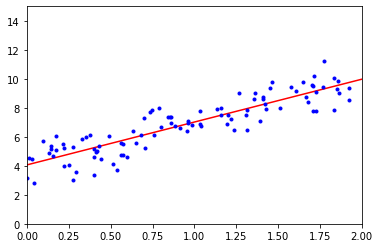

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

- 사이킷런에서 선형 회귀를 수행하는 것은 간단하다.

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([4.06420944]), array([[2.95488396]]))

In [11]:
lin_reg.predict(X_new)

array([[4.06420944],
       [9.97397735]])

- `LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수(최소 제곱 함수)를 기반으로 한다. 이 함수를 직접 호출해보자.

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd


array([[4.06420944],
       [2.95488396]])

- 이 함수는 $\hat{\theta} = X^+ y$을 계산한다. 여기에서 $X^+$는 $X$의 유사역행렬(pseudoinverse), 정확하게는 무어-펜로즈 역행렬이다.
- `np.linalg.pinv()` 함수를 사용해 유사역행렬을 직접 구할 수 있다.

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.06420944],
       [2.95488396]])

- 유사역행렬은 SVD(singular value decomposition)을 사용해 계산한다. SVD는 훈련 세트 행렬 $X$를 $U \sum V^T$ 형태로 분해하는데, 유사역행렬은  $X^+ = V \sum^+ U^T$로 계산한다. 
- $\sum^+$은 아래와 같이 구할 수 있다.
  1. $\sum$을 먼저 구한다. 
  2. 임의의 임계값보다 작은 모든 수를 0으로 바꾸고, 0이 아닌 모든 값을 역수로 치환한다.
  3. 행렬을 전치한다.
- 이 방법은 정규 방정식을 계산하는 것보다 훨씬 효율적이며, 정규 방정식을 풀 수 없을 때(역행렬이 없을 때)도 사용할 수 있다.

#### | **4.1.2 계산 복잡도**
- 정규 방정식은 $(n+1) \times (n+1)$ 크기인 $X^TX$의 역행렬을 계산한다. 이때, 역행렬을 계산하는 계산 복잡도는 일반적으로 $O(n^{2.4})$~$O(n^{3})$으로 n의 크기에 따라 계산 시간이 길어질 수 있다.
- 사이킷런의 `LinearRegression` 클래스가 사용하는 SVD 방법은 약 $O(n^{2})$이다. n이 2배가 되면, 계산 시간은 4배가 된다.
- 또한 예측하려는 샘플이 두 배로 늘어나면 걸리는 시간도 거의 두 배 증가한다.
- 이제 피처가 매우 많고, 훈련 샘플이 많아 메모리에 모두 담을 수 없을 때 사용할 수 있는 선형 회귀 모델 훈련법에 대해 알아보자.

## **4.2 경사 하강법**
____
- 경사하강법은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다.
- 경사하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정하는 것이다.
- 파라미터 벡터 $\theta$에 대해 비용 함수의 현재 그레디언트(gradient)르 계산하고, 그레디언트가 감소하는 방향으로 파라미터를 업데이트한다. 이때, 그레디언트가 0이 되면 최솟값에 도달함을 의미한다.
  + $\theta$를 임의의 값에서 시작(random initialization)한다.
  + 한 번에 조금씩 비용 함수가 감소되는 방향으로 진행하여, 최솟값으로 수렴할 때까지 점진적으로 향상시킨다.

  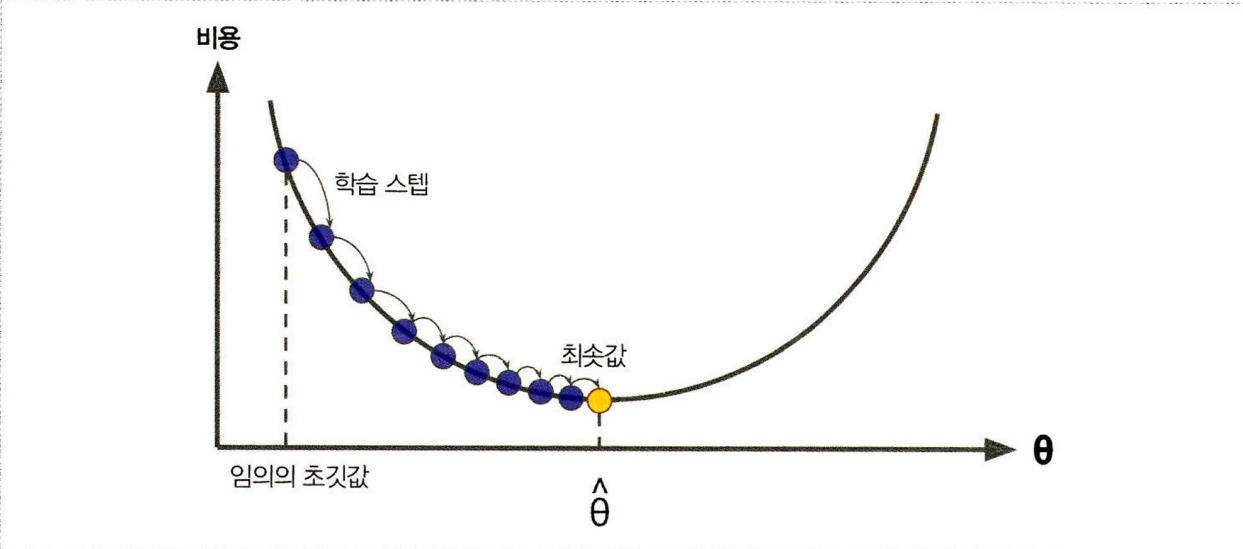

- 경사 하강법에서 중요한 파라미터는 '스텝의 크기'로 **학습률** 하이퍼 파라미터로 결정된다.
- 학습률이 너무 작으면, 알고리즘이 수렴하기 위해 반복을 많이 진행해 시간이 오래 걸린다. 반대로 학습률이 너무 크면 수렴하지 못할 수 있다.
- 비용 함수의 모양과 시작값에 따라 최솟값으로 수렴하지 못할 수도 있는데, 다행히 MSE는 해당되지 않느다.
- 모델 훈련은 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 것이다. 이를 모델의 파라미터 공간에서 찾는다고도 한다.

#### | **4.2.1 배치 경사 하강법**
- 경사하강법을 구현하려면, 각 모델 파라미터 $\theta_j$에 대한 비용 함수의 그레디언트를 계산해야하는데, 이를 위해서는 편미분이 필요하다.
- $\theta_j$에 대한 비용 함수 MSE의 편도함수(partial derivative)는 아래와 같다.
$$ \frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)}) x_{j}^{(i)}$$
- 이를 행렬을 이용하여 표현하면 아래와 같이 계산 가능하다.
$$ \nabla_{\theta} MSE(\theta)= \begin{pmatrix} \frac{\partial}{\partial \theta_0}MSE(\theta)  \\ \frac{\partial}{\partial \theta_1}MSE(\theta) \\ ... \\ \frac{\partial}{\partial \theta_n}MSE(\theta) \end{pmatrix} = \frac{2}{m}X^T(X\theta - y)$$
- 이렇게 계산한 그레디언트를 이용하여 경사하강법을 구현하면 다음과 같다.
$$ \theta^{(next step)} = \theta - \eta \nabla_{\theta} MSE(\theta)$$
- 이 알고리즘을 파이썬으로 간단히 구현해보자.

In [14]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[4.06420944],
       [2.95488396]])

- 정규 방정식으로 찾은 것과 같은 결과를 얻었다.
- 학습률에 따라 수행 시간과 수렴 여부가 달라진다. 적절한 학습률을 찾으려면 그리드 탐색을 사용한다. 하지만 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 찾을 수 있기 때문에 반복 횟수를 제한해야 한다.
  + 반복 횟수를 아주 크게 지정하고, 그레디언트 벡터가 허용 오차보다 작아지면 알고리즘을 중지하는 방식으로 제한할 수 있다.

#### | **4.2.2 확률적 경사 하강법**
- 배치 경사 하강법은 매 스텝에서 전체 훈련 세트를 사용해 그레디언트를 계산하여, 훈련 세트가 커지면 매우 느려진다는 점이 큰 문제이다.
- 이와는 반대로 **확률적 경사 하강법**은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다. 매 반복에서 다뤄야 할 데이터가 매우 적어 알고리즘 수행 시간이 훨씬 짧아진다.
- 하지만 샘플을 고르는 기준이 확률적(즉, 무작위)이기 때문에, 배치 경사 하강법보다 불안정하다.
- 이를 해결하기 위한 한 가지 방법은 학습률을 점진적으로 감소시키는 것이다.

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

- 일반적으로 한 반복에서 샘플 수 만큼 되풀이하는데, 각 반복을 **에포크(epoch)**라고 한다.
- 위 코드는 에포크가 50개로 배치 경사 하강법보다 반복 횟수가 적지만, 그럼에도 불구하고 매우 좋은 값에 도달한 것을 확인할 수 있다.

In [17]:
theta

array([[4.07819675],
       [2.96319501]])

- 사이킷런에서 SGD 방식(확률적 경사 하강법)으로 선형 회귀를 사용하려면, 기본값으로 제곱 오차 비용 함수를 최적화하는 `SGDRegressor` 클래스를 사용한다.

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

- 여기에서도 정규 방정식으로 구한 것과 매우 비슷한 값을 얻었다.

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.13729136]), array([3.02925288]))

#### | **4.2.3 미니배치 경사 하강법**
- **미니배치 경사하강법(mini-batch gradient descent)** : 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레디언트를 계산하는 것이 아니라, 미니 배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트를 계산한다.
- 미니 배치를 어느 정도 크게 하면 파라미터 공간에서 SGD보다 덜 불규칙하게 움직여, SGD보다 최솟값에 더 가까이 도달한다. 단, Local Minimum에서 빠져나오기는 더 힘들 수 있다.

## **4.3 다항 회귀**
____
- 비선형 데이터를 학습하더라도 선형 모델을 사용할 수 있다. - 이 중 하나가 각 피처의 거듭제곱을 새로운 피처로 추가하고, 이 확장된 피처를 데이터셋에 선형 모델을 훈련시키는 **다항 회귀(polynomial regression)**이다.
- 예를 들어, 간단한 2차 방정식으로 비선형 데이터를 생성해보자.

In [20]:
# random seed
np.random.seed(42)

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

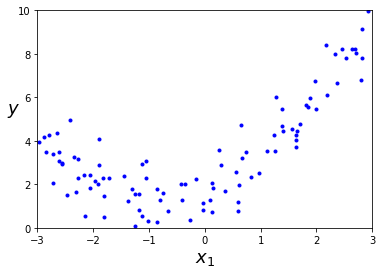

In [22]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

- 확실히 직선은 이 데이터와 잘 맞지 않을 것 같다.
- 사이킷런의 `PolynomialFeatures`를 사용해 훈련 데이트를 변환해보자.

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) # 각 피처의 제곱항이 새로운 피처로 추가
X_poly = poly_features.fit_transform(X)

In [24]:
X[0]

array([-0.75275929])

In [25]:
X_poly[0]

array([-0.75275929,  0.56664654])

- `X_poly`는 원래 피처 X의 값과 그 제곱을 포함하는 것을 확인할 수 있다.
- 이 확장된 훈련 데이터에 `LinearRegression`을 적용해보자.

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

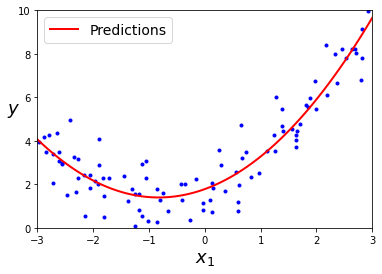

In [27]:
# 그래프 그리기
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

- 피처가 여러 개일 때, 다항 회귀는 이 피처들 사이의 관계를 찾을 수 있다. 

## **4.4 학습 곡선**
____
- 고차 다항 회귀를 적용하면 보통의 선형 회귀보다 훨씬 더 훈련 데이터에 잘 맞춘다. 그러나 이는 과대적합으로 이어질 수 있다.
- 과대적합 여부는 다음과 같이 확인할 수 있다.
  1. 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과대적합된 것이다.
  2. 학습 곡선을 살펴본다.
- **학습 곡선**은 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸다. 이 그래프를 생성하기 위해서는 단순하게 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 된다.

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

- 단순 선형 회귀 모델(직선)의 학습 곡선을 살펴보자.

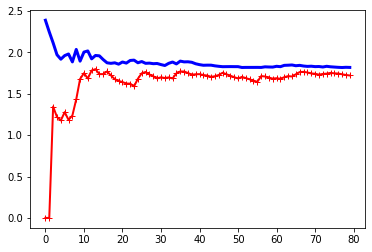

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

plt.show()  

- 위 그래프는 과소적합 모델의 전형적인 모습니다.
  1. 훈련 세트(red)에서는 곡선이 어느 정도 평평해질 때까지 오차가 계속 상승한다.
  2. 검증 세트(blue)에서는 모델에 샘플이 추가됨에 따라 검증 오차가 천천히 감소한다. 하지만 오차 감소가 점차 완만해지면서 훈련 세트의 그래프에 가까워진다.
- 이제 같은 데이터를 이용하여 10차 다항 회귀 모델의 학습 곡선을 그려보자.

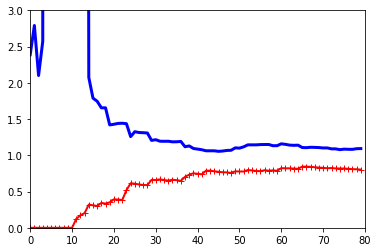

In [30]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])  

plt.show() 

- 위 그래프는 다음과 같은 특징을 보이고 있다.
  1. 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
  2. 두 곡선 사이에 공간이 넓다. 이는 과대적합 모델의 특징. 다만 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.

## **4.5 규제가 있는 선형 모델**
____
- 과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것이다.
- 자유도를 줄이면, 데이터에 과대적합되기 어려워진다.
- 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것이다.
- 선형 회귀 모델에서는 보통 모델의 가중치를 제한하여, 규제를 한다.

#### | **4.5.1 릿지 회귀**
- **릿지 회귀(Ridge Regression)** 혹은 티호노프 규제는 규제가 추가된 선형 회귀 모델이다.
- 규제항 $\alpha \sum^n_{i=1} \theta_i^2$이 비용 함수에 추가된다.
  + 이는 학습 알고리즘을 데이터에 맞추는 것 뿐만 아니라, **모델의 가중치를 가능한 작게 유지**합니다.
  + 규제항은 훈련하는 동안에만 비용 함수에 추가된다.
  + 모델의 훈련이 끝나면 모델의 성능은 규제가 없는 성능 지표로 평가한다.
- 하이퍼파라미터 $\alpha$는 모델을 얼마나 많이 규제할지 조절한다.
  + $\alpha  = 0$이면 릿지 회귀는 선형 회귀와 같다.
  + $\alpha$가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다.
- 아래는 릿지 회귀의 비용 함수이다.
$$ J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum^n_{i=1} \theta^2_i$$
  + 편향 $\theta_0$는 규제되지 않는다.
  + **w**를 특성의 가중치 벡터라고 정의하면 규제항은 $1/2( \lvert \lvert w \rvert \rvert_2)^2$와 같다.
  + 경사 하강법에 적용하려면 MSE의 그레디언트에 $\alpha$**w**를 더하면 된다.
- 다항 회귀의 경우, $\alpha$가 증가할수록 직선에 가까워진다. 즉, 모델의 분산은 줄고, 편향은 커진다.
- 릿지 회귀도 선형 회귀처럼 정규방정식을 사용할 수 있고 경사 하강법을 사용할 수 있다. 각 방법의 장단점은 선형 회귀와 같다.
  + 정규방정식의 해
  $$ \hat{\theta} = (X^TX + \alpha A)^{-1}X^Ty$$
  + $A$는 편향에 해당하는 맨 왼쪽 위의 원소가 0인 $(n+1) \times (n+1)$ 단위 행렬(identity matrix)
- 다음은 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예이다. 안드레 루이 숄레스키가 발견한 행렬 분해를 사용하여 위 식을 변형한 방정식을 사용한다.

In [31]:
# example data
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [32]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

- 다음은 확률적 경사 하강법을 사용했을 때이다.

In [33]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

- 위 코드에서 `penalty` 매개변수는 사용할 규제를 지정한다. 릿지 회귀를 사용하려면 `'l2'`로 지정해주면 된다.

#### | **4.5.2 라쏘 회귀**
- **라쏘 회귀(Lasso Regression)**는 릿지와는 다른 규제를한 선형 회귀이다.
- 라쏘 회귀의 비용 함수
$$J(\theta) = MSE(\theta) + \alpha \sum^n_{i=1} \lvert \theta_i \rvert$$
- 라쏘 회귀는 덜 중요한 특성의 가중치를 제거하는 경향이 있다. 즉, 가중치가 0이 되는 것이다. 다시 말해 라쏘 회귀는 자동으로 피처 선택을 하고 **희소 모델(sparse model)**을 만든다.
- 라쏘의 비용 함수는 $\theta_i = 0(i = 1, 2, \cdots, n)$일 때 미분 가능하지 않다. 그러나 이때 서브그레디언트 벡터 $g$를 사용하면 경사 하강법을 적용할 수 있다.
$$g(\theta, J)= \nabla_{\theta} MSE(\theta) + \alpha 
\begin{pmatrix}
sign(\theta_1)  \\
sign(\theta_2)  \\ ... \\ 
sign(\theta_n) \end{pmatrix}
,sign(\theta_i)
\begin{cases} 
-1,\;if\; \theta_i < 0\\
0,\;if\;\theta_i = 0\\
1,\;if\;\theta_i > 0
\end{cases}$$
- 다음은 사이킷런의 `Lasso` 클래스르르 사용한 간단한 에제이다.

In [34]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

- `Lasso` 대신 `SGDRegressor(penalty= 'l1')을 사용할 수도 있다.

#### | **4.5.3 엘라스틱넷**
- **엘라스틱넷(elsatic net)**은 릿지 회귀와 라쏘 회귀를 절충한 모델이다.
- 규제항은 릿지와 라쏘의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절한다.
$$J(\theta) = MSE(\theta) + r\alpha \sum^n_{i=1} \lvert \theta_i \rvert + \frac{1-r}{2} \alpha \sum^n_{i=1} \theta^2_i$$
  + $r=0$이면 엘라스틱넷은 릿지 회귀와 같다.
  + $r=1$이면 엘라스틱넷은 라쏘 회귀와 같다.
- 그럼 선형 회귀(규제X), 릿지, 라쏘, 엘라스틱넷은 언제 사용해야 할까?
  + 규제가 약간 있는 것이 대부분의 경우에 좋아, 일반적으로 평범한 선형 회귀는 사용하지 않는다.
  + 릿지가 기본이지만, 중요한 피처가 일부라고 의심되면 라쏘나 엘라스틱넷이 낫다.
  + 피처 수가 훈련 샘플 수보다 많거나 피처 몇 개가 강하게 연관되어 있으면, 보통 라쏘가 문제를 일으켜 엘라스틱넷을 선호한다.
- 다음은 사이킷런의 `ElasticNet`을 사용한 간단한 예제이다. 여기서 `l1_ratio`가 혼합 비율 $r$이다.

In [35]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

#### | **4.5.4 조기 종료**
- 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 다른 방식은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지하는**조기 종료(early stoppin)**라고 한다.
- 배치 경사 하강법으로 훈련시킨 복잡한 모델(예: 고차 다항 회귀 모델)은 에포크가 진행됨에 따라 학습이 진행되어, 훈련 세트에 대한 예측 에러와 검증 세트에 대한 예측 에러가 줄어든다. 그러나 잠시 후 감소하던 검증 에러가 멈추었다가 다시 상승한다. 이는 모델이 훈련 데이터에 과대적합되기 시작하는 것을 의미한다.
 + 조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것이다.
- 아래는 조기 종료를 위한 기본적인 구현 코드이다.

In [36]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [37]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# 데이터 준비
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [38]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

In [40]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 훈련을 이어서 진행한다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

- `warm_start = True`로 지정하면 `fit()` 메서드가 호출될 때 처음부터 시작하지 않고, 이전 모델 파라미터에서 훈련을 이어간다.

## **4.6 로지스틱 회귀**
____
- 어떤 회귀 알고리즘은 분류에서도 사용할 수 있는데, **로지스틱 회귀(logistic regression)**이 그 예이다.
- 로지스틱 회귀는 샘플이 특정 클래스에 속할 확률을 추정할 때 널리 사용한다. 추정 확률이 50%가 넘으면 모델은 그 샘플이 특정 클래스에 속한다고 예측하거나, 속하지 않는다고 예측하는 이진 분류기에 해당한다.

#### | **4.6.1 확률 추정**
- 로지스틱 회귀 모델도 선형 모델처럼 피처의 가중치 합을 계산하고, 편향을 더한다. 대신 바로 결과를 출력하지 않고, 결과값의 **로지스틱(logistic)**을 출력한다는 차이가 있다.
$$\hat{p} = h_{\theta}(x) = \sigma(\theta^T x)$$
- 로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수(sigmoid function)이다. 
$$ \sigma(t) = \frac{1}{1 + exp(-t)}$$
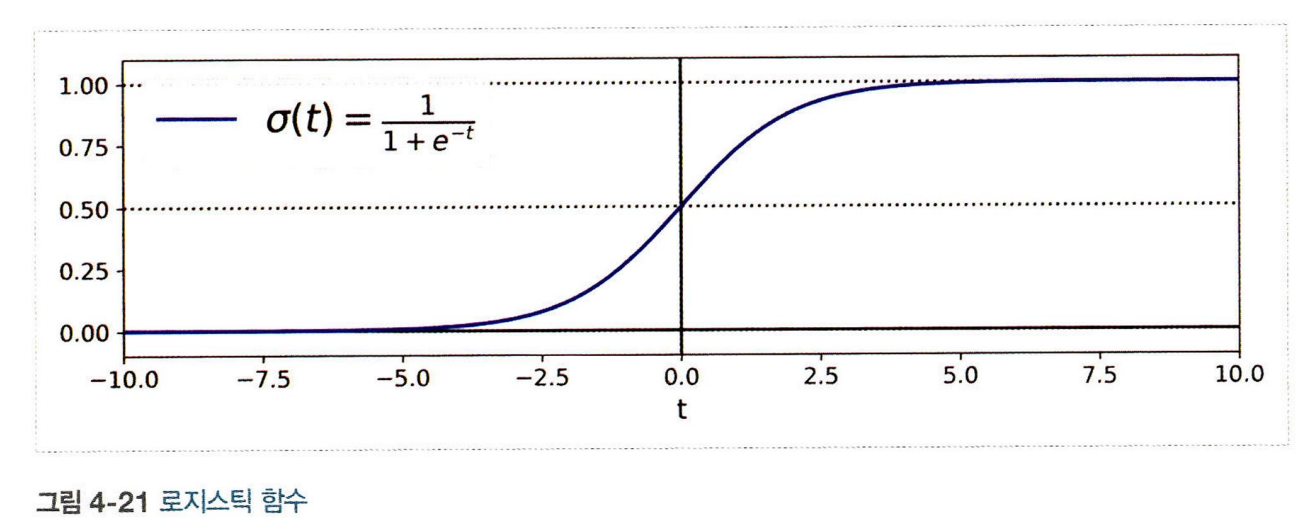

- 로지스틱 회귀 모델이 샘플 **x**가 양성 클래스에 속할 확률 $\hat{p} = h_{\theta}(x)$를 추정하면, 이에 대한 예측값 $\hat{y}$는 다음과 같이 구할 수 있다.
$$\hat{y}=
\begin{cases}
0,\;if\;\hat{p}<0.5\\
1,\;if\;\hat{p}\geq0.5
\end{cases}$$

#### | **4.6.2 훈련과 비용 함수**
- 로지스틱 회귀 모델의 훈련 목적은 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고, 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것이다.
- 이는 하나의 훈련 샘플에 대한 비용 함수를 보면 잘 반영되어 있는 것을 확인할 수 있다.
$$c(\theta)=
\begin{cases}
-log(\hat{p}),\;if\;y=1\\
-log(1-\hat{p}),\;if\; y=0
\end{cases}$$
- 전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것인데, 이를 로그 손실(log loss)라고 부른다.
$$J(\theta)= - \frac{1}{m} \sum_{i=1}^m [y^{(i)}log(\hat{p}^{(i)})
+ (1-y^{(i)})log(1-\hat{p}^{(i)})]$$
- 그러나 이 비용 함수의 최솟값을 해석학적으로 계산하는 알려진 해법은 없다. 하지만 이 비용 함수는 볼록 함수이기 때문에, 경사 하강법으로 Global Minimum을 찾을 수 있다.
- 파라미터에 대한 비용 함수의 그레디언트를 구하기 위한 각 파라미터 $\theta_j$에 대해 편미분은 아래와 같다.
$$ \frac{\partial}{\partial \theta_j}J(\theta)= \frac{1}{m} \sum_{i=1}^m(\sigma (\theta^T x^{(i)}) - y^{(i)})x_j^{(i)}$$

#### | **4.6.3 결정 경계**
- 로지스틱 회귀를 설명하기 위해 붓꽃 데이터셋을 사용한다.
  + 이 데이터셋은 세 개의 품종에 속하는 붓꽃 150개의 꽃잎(petal)과 꽃받침(sepal)의 너비와 길이를 담고 있다.
  + 꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류 모델을 만들어보자.

In [41]:
# Load Data
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [42]:
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(np.int) # Iris-virginica이면 1, 그렇지 않으면 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


- 로지스틱 회귀 모델을 훈련시킨다.

In [43]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

- 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산해보자.

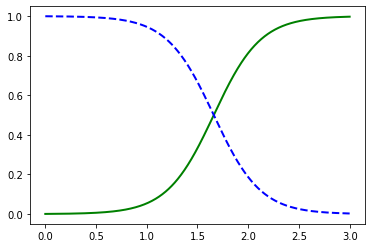

In [44]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

- 가장 가능성이 높은 클래스를 반환한다.
- 1.6cm 근방에서 **결정 경계(decision boundary)**가 만들어진다. 꽃잎 너비가 1.6cm보다 크면 Iris-Verginica로 분류하고, 그보다 작으면 아니라고 예측한다.

In [45]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

- 로지스틱 회귀의 결정 경계는 선형이다.

#### | **4.6.4 소프트맥스 회귀**
- 로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있다. 이를 **소프트맥스 회귀(softmax regression)** 혹은 **다항 로지스틱 회귀(multinomial logistic regresseion)**이라고 한다.
- 샘플 **x**가 주어지면, 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 $s_k$(**x**)를 계산하고, 그 점수에 소프트맥스 함수(softmax function)를 적용하여 각 클래스의 확률을 추정한다. 클래스 k에 대한 소프트맥스 점수는 다음과 같다.
$$s_k(x) = (\theta^{(k)})Tx$$
- 각 클래스는 자신만의 파라미터 벡터 $\theta^{(k)}$가 있다. 이 벡터들은 파라미터 행렬에 행으로 저장된다.
- 샘플 **x**에 대한 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜, 클래스 k에 속할 확률 $\hat{p_k}$를 추정할 수 있다.
- 일반적으로 이 점수를 로짓 또는 로그-오즈라고 한다.
$$\hat{p_k} = \sigma(s(x))_k = \frac{exp(s_k (x))}{\sum_{i=1}^K exp(s_j(x))}$$
  + K는 클래스 수이다.
  + s(x)는 샘플 x에 대한 각 클래스의 점수를 담은 벡터이다.
  + $\sigma(s(x))_k$는 샘플 x에 대한 각 클래스의 점수가 주어졌을 때, 이 샘플이 클래스 k에 속할 추정 확률이다.
- 로지스틱 회귀 모델처럼 소프트맥스 회귀 모델도 추정 확률이 가장 높은 클래스를 선택한다.
$$\hat{y} = argmax \sigma(s(x))_k = argmax s_k(x) = argmax ((\theta^{(k)})^T x)$$
 + `argmax` 연산은 함수를 최대화하는 변수의 값을 반환한다.
 + 이 식에서는 추정확률 $\sigma(s(x))_k$가 최대인 k값을 반환한다.
- 이번에는 모델 훈련 방법에 대해 살펴보자.
- 모델이 타깃 클래스에 대해서는 높은 확률을, 다른 클래스에 대해서는 낮은 확률을 추정하도록 만드는 것이 목적이다. 이에 부합하는 비용 함수가 아래 식의 **크로스 엔트로피(cross-entropy)** 함수이다.
$$J(\theta) = - \frac{1}{m}
\sum_{i=1}^m
\sum_{k=1}^K y_k^{(i)} log(\hat{p}_k^{(i)})$$
- 이 비용 함수의 $\theta^(k)$에 대한 그레디언트 벡터는 다음과 같다.
$$ \nabla_{\theta^{(k)}}J(\theta_{big}) = - \frac{1}{m}
\sum_{i=1}^m 
(\hat{p}_k^{(i)} - y_k^{(i)})x^{(i)}$$
- 소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류해보자.
  + 사이킷런의 `LogistcRegression` 클래스가 둘 이상이면, 일대다(OvA) 전략을 사용한다.
  + 하지만 `multi_class` 매개변수를 **'multinomial'**로 바꾸면 소프트맥스 회귀를 이용할 수 있다. 
  + `solver` 매개변수에 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 한다.
  + 기본적으로 하이퍼 파라미터 `C`를 이용하여, $l2$ 규제가 적용된다.

In [46]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

In [47]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [48]:
softmax_reg.predict([[5,2]])

array([2])

In [49]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])